Saving IMG_20240909_154324.jpg to IMG_20240909_154324.jpg


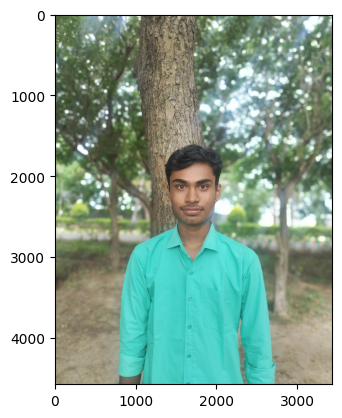

Detected emotions: {'angry': 0.1, 'disgust': 0.0, 'fear': 0.06, 'happy': 0.11, 'sad': 0.12, 'surprise': 0.01, 'neutral': 0.6}


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

  warnings.warn(



model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Dominant Emotion: neutral


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Analysis from LLM:
The person is feeling neutral. Please provide some suggestions for mental well-being based on this emotional state.

The person is feeling calm. Please provide some suggestions for mental well-being based on this emotional state.

The person is feeling happy. Please provide some suggestions for mental well-being based on this emotional state.

The person is feeling sad. Please provide some suggestions for mental well-being based on this emotional state.

The person is feeling sad. Please provide


In [1]:
# Install necessary libraries
!pip install fer
!pip install transformers
!pip install torch torchvision torchaudio
!pip install opencv-python

# Import required libraries
import cv2
from fer import FER
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load an image from your local drive
from google.colab import files
uploaded = files.upload()

# Load the image using OpenCV
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Initialize the FER model
emotion_detector = FER()

# Detect emotions in the image
emotions = emotion_detector.detect_emotions(image)

# Display the image with detected emotions
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Output the emotions
if emotions:
    detected_emotions = emotions[0]['emotions']
    print(f"Detected emotions: {detected_emotions}")
else:
    print("No face detected.")

# Load the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Function to get analysis based on emotion
def generate_analysis(emotion_data):
    prompt = f"The person is feeling {emotion_data}. Please provide some suggestions for mental well-being based on this emotional state."

    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the output from GPT-2
    outputs = model.generate(inputs['input_ids'], max_length=100, num_return_sequences=1)

    # Decode and return the generated text
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example usage with detected emotions
if emotions:
    dominant_emotion = max(detected_emotions, key=detected_emotions.get)
    print(f"Dominant Emotion: {dominant_emotion}")

    # Generate analysis from LLM
    llm_analysis = generate_analysis(dominant_emotion)
    print("Generated Analysis from LLM:")
    print(llm_analysis)
else:
    print("No emotions detected to analyze.")
